In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("real_estate_data.csv", low_memory=False, index_col="id")

In [3]:
df

,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
id,,,,,,,,,,,,,,,,
1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500.0,TRY
2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000.0,TRY
3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000.0,TRY
4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000.0,TRY
5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403483,Konut,Daire,9/18/18,NaN,2,162,NaN,NaN,NaN,+,NaN,İstanbul/Sultanbeyli/Adil,NaN,NaN,1500.0,TRY
403484,Konut,Daire,10/11/18,NaN,1,139,NaN,NaN,NaN,2+1,NaN,Sakarya/Adapazarı/Cumhuriyet,NaN,NaN,120000.0,TRY
403485,Konut,Daire,11/22/18,NaN,1,97,NaN,NaN,NaN,1+1,NaN,Antalya/Alanya/Saray,NaN,NaN,48000.0,EUR


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403487 entries, 1 to 403487
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   type               403487 non-null  object 
 1   sub_type           403487 non-null  object 
 2   start_date         403487 non-null  object 
 3   end_date           266298 non-null  object 
 4   listing_type       403487 non-null  int64  
 5   tom                403487 non-null  int64  
 6   building_age       376097 non-null  object 
 7   total_floor_count  375466 non-null  object 
 8   floor_no           368191 non-null  object 
 9   room_count         403487 non-null  object 
 10  size               257481 non-null  float64
 11  address            403487 non-null  object 
 12  furnished          0 non-null       float64
 13  heating_type       375517 non-null  object 
 14  price              402772 non-null  float64
 15  price_currency     402772 non-null  object 
dtypes: floa

In [5]:
df.head(10)

,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
id,,,,,,,,,,,,,,,,
1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500.0,TRY
2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000.0,TRY
3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000.0,TRY
4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000.0,TRY
5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000.0,TRY
6,Konut,Rezidans,11/9/18,12/9/18,1,30,2,10-20 arası,10,1+1,45.0,İstanbul/Maltepe/Altayçeşme,NaN,Fancoil,780000.0,TRY
7,Konut,Daire,1/4/19,NaN,2,54,0,20 ve üzeri,14,3+1,160.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3750.0,TRY
8,Konut,Villa,10/3/18,1/3/19,1,92,0,4,NaN,4+1,NaN,İzmir/Urla/M. Fevzi Çakmak,NaN,Fancoil,1500000.0,TRY
9,Konut,Daire,2/16/19,NaN,1,11,NaN,2,Kot 2,3+1,140.0,Çanakkale/Ayvacık/Küçükkuyu Bld. (Mıhlı),NaN,Fancoil,1500000.0,TRY


In [6]:
df.isna().sum()


type                      0
sub_type                  0
start_date                0
end_date             137189
listing_type              0
tom                       0
building_age          27390
total_floor_count     28021
floor_no              35296
room_count                0
size                 146006
address                   0
furnished            403487
heating_type          27970
price                   715
price_currency          715
dtype: int64

In [7]:
df.drop(columns='furnished', inplace=True)

In [8]:
df

,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
id,,,,,,,,,,,,,,,
1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,TRY
2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,TRY
3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,TRY
4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,TRY
5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403483,Konut,Daire,9/18/18,NaN,2,162,NaN,NaN,NaN,+,NaN,İstanbul/Sultanbeyli/Adil,NaN,1500.0,TRY
403484,Konut,Daire,10/11/18,NaN,1,139,NaN,NaN,NaN,2+1,NaN,Sakarya/Adapazarı/Cumhuriyet,NaN,120000.0,TRY
403485,Konut,Daire,11/22/18,NaN,1,97,NaN,NaN,NaN,1+1,NaN,Antalya/Alanya/Saray,NaN,48000.0,EUR


In [9]:
df.dropna(subset='price', inplace=True)

In [10]:
df[df['price'].isna()]

,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
id,,,,,,,,,,,,,,,


In [11]:
df.isna().sum()

type                      0
sub_type                  0
start_date                0
end_date             136474
listing_type              0
tom                       0
building_age          26992
total_floor_count     27649
floor_no              34698
room_count                0
size                 145392
address                   0
heating_type          27580
price                     0
price_currency            0
dtype: int64

In [12]:
delete = df[df['end_date'].isna() & df['floor_no'].isna() & df['total_floor_count'].isna() & df['building_age'].isna() & df['heating_type'].isna()]
delete

,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
id,,,,,,,,,,,,,,,
375518,Konut,Villa,12/19/18,NaN,1,70,NaN,NaN,NaN,2+1,95.0,Tekirdağ/Muratlı/Yeşilsırt,NaN,180000.0,TRY
376246,Konut,Daire,11/27/18,NaN,1,92,NaN,NaN,NaN,3+1,NaN,Kocaeli/Gölcük/Piyalepaşa,NaN,185000.0,TRY
376262,Konut,Daire,2/7/19,NaN,2,20,NaN,NaN,NaN,2+1,80.0,İstanbul/Bayrampaşa/Muratpaşa,NaN,1200.0,TRY
376264,Konut,Daire,1/24/19,NaN,1,34,NaN,NaN,NaN,2+1,110.0,Çanakkale/Biga/Sakarya,NaN,155000.0,TRY
376268,Konut,Daire,1/18/19,NaN,1,40,NaN,NaN,NaN,2+1,95.0,Aydın/Kuşadası/Davutlar,NaN,230000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403477,Konut,Daire,2/11/19,NaN,1,16,NaN,NaN,NaN,3+1,110.0,Ankara/Mamak/Araplar,NaN,200000.0,TRY
403483,Konut,Daire,9/18/18,NaN,2,162,NaN,NaN,NaN,+,NaN,İstanbul/Sultanbeyli/Adil,NaN,1500.0,TRY
403484,Konut,Daire,10/11/18,NaN,1,139,NaN,NaN,NaN,2+1,NaN,Sakarya/Adapazarı/Cumhuriyet,NaN,120000.0,TRY


In [13]:
df.drop(delete.index, inplace=True)

In [14]:
df

,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
id,,,,,,,,,,,,,,,
1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,TRY
2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,TRY
3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,TRY
4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,TRY
5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403478,Konut,Daire,9/12/18,10/2/18,2,20,NaN,NaN,NaN,2+1,NaN,Konya/Selçuklu/Hanaybaşı,NaN,850.0,TRY
403479,Konut,Daire,10/12/18,11/11/18,1,30,NaN,NaN,NaN,3+1,NaN,Aydın/Didim/Efeler,NaN,500000.0,TRY
403480,Konut,Daire,9/12/18,11/20/18,2,69,NaN,NaN,NaN,3+1,NaN,Aydın/Kuşadası/Türkmen,NaN,1700.0,TRY


In [15]:
delete = df[df['floor_no'].isna() & df['total_floor_count'].isna()]
delete

,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
id,,,,,,,,,,,,,,,
210,Konut,Daire,2/15/19,NaN,1,12,0,NaN,NaN,3+1,120.0,Çanakkale/Ayvacık/Küçükkuyu Bld. (Mıhlı),Fancoil,1350000.0,TRY
234,Konut,Daire,2/25/19,NaN,2,2,NaN,NaN,NaN,1+1,45.0,Antalya/Muratpaşa/Muratpaşa,Fancoil,100.0,TRY
580,Konut,Daire,2/19/19,NaN,1,8,4,NaN,NaN,2+1,85.0,Muğla/Bodrum/Bitez,Yok,530000.0,TRY
646,Konut,Villa,1/29/19,NaN,1,29,2,NaN,NaN,5+1,160.0,İzmir/Çeşme/Çiftlik,Yok,920000.0,TRY
658,Konut,Villa,1/29/19,NaN,1,29,21-25 arası,NaN,NaN,3+2,250.0,İzmir/Çeşme/Alaçatı,Yok,885000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403478,Konut,Daire,9/12/18,10/2/18,2,20,NaN,NaN,NaN,2+1,NaN,Konya/Selçuklu/Hanaybaşı,NaN,850.0,TRY
403479,Konut,Daire,10/12/18,11/11/18,1,30,NaN,NaN,NaN,3+1,NaN,Aydın/Didim/Efeler,NaN,500000.0,TRY
403480,Konut,Daire,9/12/18,11/20/18,2,69,NaN,NaN,NaN,3+1,NaN,Aydın/Kuşadası/Türkmen,NaN,1700.0,TRY


In [16]:
df.drop(delete.index, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380891 entries, 1 to 394927
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   type               380891 non-null  object 
 1   sub_type           380891 non-null  object 
 2   start_date         380891 non-null  object 
 3   end_date           253583 non-null  object 
 4   listing_type       380891 non-null  int64  
 5   tom                380891 non-null  int64  
 6   building_age       373215 non-null  object 
 7   total_floor_count  375123 non-null  object 
 8   floor_no           368074 non-null  object 
 9   room_count         380891 non-null  object 
 10  size               248130 non-null  float64
 11  address            380891 non-null  object 
 12  heating_type       372529 non-null  object 
 13  price              380891 non-null  float64
 14  price_currency     380891 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 46.5+ 

In [18]:
df.isna().sum()

type                      0
sub_type                  0
start_date                0
end_date             127308
listing_type              0
tom                       0
building_age           7676
total_floor_count      5768
floor_no              12817
room_count                0
size                 132761
address                   0
heating_type           8362
price                     0
price_currency            0
dtype: int64

In [19]:
def process_floor_no(value):
    if pd.isna(value):
        return 0
    
    str_value = str(value)
    
    # Если значение содержит только буквы и/или пробелы (без цифр)
    if str_value.replace(' ', '').isalpha():
        return 0
    
    # Извлекаем цифры из смешанных значений
    digits = ''.join(filter(str.isdigit, str_value))
    return int(digits) if digits else 0

df['floor_no'] = df['floor_no'].apply(process_floor_no)

In [20]:
df.total_floor_count.value_counts()

total_floor_count
4              83046
3              77933
5              70019
10-20 arası    36505
2              27732
6              23192
10             12549
7              12278
8              11204
9               9024
20 ve üzeri     6678
1               4963
Name: count, dtype: int64

In [21]:
df

,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
id,,,,,,,,,,,,,,,
1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,TRY
2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20,1+0,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,TRY
3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,0,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,TRY
4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20,6+1,450.0,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,TRY
5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394883,Konut,Müstakil Ev,10/4/18,11/5/18,1,32,26-30 arası,1,0,2+1,NaN,KKTC/İskele/Boğaz Mh.,NaN,35000.0,GBP
394903,Konut,Prefabrik Ev,12/4/18,1/3/19,1,30,NaN,1,0,1+1,40.0,İstanbul/Pendik/Kaynarca,NaN,31500.0,TRY
394917,Konut,Müstakil Ev,12/18/18,2/16/19,1,60,0,2,0,5+2,315.0,Muğla/Bodrum/Gündoğan,NaN,5500000.0,TRY


In [22]:
df[df['end_date'].isna() & df['floor_no'].isna() & df['total_floor_count'].isna() & df['building_age'].isna() & df['heating_type'].isna()]


,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
id,,,,,,,,,,,,,,,


In [23]:
df[df['total_floor_count'].isna() & df['floor_no'].isna()]

,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
id,,,,,,,,,,,,,,,


In [24]:
df[df['size'].isna()]

,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
id,,,,,,,,,,,,,,,
3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,0,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,TRY
8,Konut,Villa,10/3/18,1/3/19,1,92,0,4,0,4+1,NaN,İzmir/Urla/M. Fevzi Çakmak,Fancoil,1500000.0,TRY
13,Konut,Daire,9/13/18,10/13/18,1,30,0,3,2,2+1,NaN,Aydın/Efeler/Ata,Fancoil,270000.0,TRY
14,Konut,Rezidans,10/3/18,11/2/18,1,30,0,10-20 arası,11,2+1,NaN,Mersin/Yenişehir/Akkent,Fancoil,270000.0,TRY
15,Konut,Daire,9/22/18,NaN,1,158,1,4,3,3+1,NaN,Manisa/Turgutlu/Şehitler,Fancoil,75000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394823,Konut,Daire,9/26/18,11/25/18,1,60,0,4,0,3+1,NaN,İstanbul/Küçükçekmece/Yeşilova,NaN,430000.0,TRY
394855,Konut,Daire,10/15/18,11/7/18,1,23,0,5,0,2+1,NaN,Manisa/Turgutlu/Cumhuriyet,NaN,60000.0,TRY
394878,Konut,Daire,10/11/18,10/11/18,1,0,0,6,0,3+1,NaN,Bursa/Osmangazi/Hamitler,NaN,350000.0,TRY


In [25]:
df.sub_type.value_counts()

sub_type
Daire                  336511
Villa                   19563
Müstakil Ev              8050
Rezidans                 7237
Yazlık                   5603
Komple Bina              2415
Prefabrik Ev              516
Çiftlik Evi               443
Köşk / Konak / Yalı       276
Yalı Dairesi              180
Kooperatif                 65
Loft                       32
Name: count, dtype: int64

In [26]:
df.sub_type.unique()

array(['Rezidans', 'Daire', 'Villa', 'Müstakil Ev', 'Kooperatif',
       'Yazlık', 'Komple Bina', 'Prefabrik Ev', 'Köşk / Konak / Yalı',
       'Çiftlik Evi', 'Yalı Dairesi', 'Loft'], dtype=object)

In [27]:
dct = {}
i = 1
for name in df.sub_type.unique():
    dct[name] = i
    i+=1
dct

{'Rezidans': 1,
 'Daire': 2,
 'Villa': 3,
 'Müstakil Ev': 4,
 'Kooperatif': 5,
 'Yazlık': 6,
 'Komple Bina': 7,
 'Prefabrik Ev': 8,
 'Köşk / Konak / Yalı': 9,
 'Çiftlik Evi': 10,
 'Yalı Dairesi': 11,
 'Loft': 12}

In [28]:
df['sub_type'] = df['sub_type'].map(dct)

In [29]:
df.drop('type',axis=1, inplace=True)
df.rename(columns={'sub_type': 'type'}, inplace=True)

In [30]:
df

,type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
id,,,,,,,,,,,,,,
1,1,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,TRY
2,2,2/13/19,NaN,1,14,0,20 ve üzeri,20,1+0,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,TRY
3,2,10/9/18,11/8/18,1,30,0,1,0,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,TRY
4,1,9/10/18,10/10/18,1,30,3,20 ve üzeri,20,6+1,450.0,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,TRY
5,1,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394883,4,10/4/18,11/5/18,1,32,26-30 arası,1,0,2+1,NaN,KKTC/İskele/Boğaz Mh.,NaN,35000.0,GBP
394903,8,12/4/18,1/3/19,1,30,NaN,1,0,1+1,40.0,İstanbul/Pendik/Kaynarca,NaN,31500.0,TRY
394917,4,12/18/18,2/16/19,1,60,0,2,0,5+2,315.0,Muğla/Bodrum/Gündoğan,NaN,5500000.0,TRY


In [31]:
df.total_floor_count.value_counts()

total_floor_count
4              83046
3              77933
5              70019
10-20 arası    36505
2              27732
6              23192
10             12549
7              12278
8              11204
9               9024
20 ve üzeri     6678
1               4963
Name: count, dtype: int64

In [32]:
df['total_floor_count'].isna().value_counts()

total_floor_count
False    375123
True       5768
Name: count, dtype: int64

In [33]:
df.floor_no.value_counts()

floor_no
0     99474
2     70831
3     56461
1     51777
4     36721
5     21186
6      9742
7      7696
8      6098
9      4855
10     3863
11     2892
12     2309
13     1701
20     1562
14     1328
15      911
16      600
17      373
18      334
19      177
Name: count, dtype: int64

### Giriş Katı - Цокольный этаж
### Müstakil - Дом
### Bahçe katı - садовый этаж
### Yüksek Giriş - 1 этаж
### Kot - просто этаж но по умному
### Teras Kat - Терасса
### Asma Kat - надстройка
### Zemin Kat - Цокольный
### Çatı Katı - пентхаус

In [35]:
df.drop(df[df['floor_no'] == 'Asma Kat'].index, axis=0, inplace=True)


In [36]:
df.replace(to_replace=['Zemin Kat', 'Giriş Katı'], value=0, inplace=True)


In [37]:
def process_floor_no(value):
    if pd.isna(value):
        return 0
    
    str_value = str(value)
    
    # Если значение содержит только буквы и/или пробелы (без цифр)
    if str_value.replace(' ', '').isalpha():
        return 0
    
    # Извлекаем цифры из смешанных значений
    digits = ''.join(filter(str.isdigit, str_value))
    return int(digits) if digits else 0

df['floor_no'] = df['floor_no'].apply(process_floor_no)

In [38]:
df.floor_no.value_counts()

floor_no
0     99474
2     70831
3     56461
1     51777
4     36721
5     21186
6      9742
7      7696
8      6098
9      4855
10     3863
11     2892
12     2309
13     1701
20     1562
14     1328
15      911
16      600
17      373
18      334
19      177
Name: count, dtype: int64

In [39]:
df.total_floor_count.value_counts()

total_floor_count
4              83046
3              77933
5              70019
10-20 arası    36505
2              27732
6              23192
10             12549
7              12278
8              11204
9               9024
20 ve üzeri     6678
1               4963
Name: count, dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380891 entries, 1 to 394927
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   type               380891 non-null  int64  
 1   start_date         380891 non-null  object 
 2   end_date           253583 non-null  object 
 3   listing_type       380891 non-null  int64  
 4   tom                380891 non-null  int64  
 5   building_age       373215 non-null  object 
 6   total_floor_count  375123 non-null  object 
 7   floor_no           380891 non-null  int64  
 8   room_count         380891 non-null  object 
 9   size               248130 non-null  float64
 10  address            380891 non-null  object 
 11  heating_type       372529 non-null  object 
 12  price              380891 non-null  float64
 13  price_currency     380891 non-null  object 
dtypes: float64(2), int64(4), object(8)
memory usage: 43.6+ MB


In [41]:
df.isna().sum()

type                      0
start_date                0
end_date             127308
listing_type              0
tom                       0
building_age           7676
total_floor_count      5768
floor_no                  0
room_count                0
size                 132761
address                   0
heating_type           8362
price                     0
price_currency            0
dtype: int64

In [42]:
df = df[df['building_age'].notna()]
df = df[df['total_floor_count'].notna()]
df = df[df['floor_no'].notna()]

In [43]:
df.isna().sum()


type                      0
start_date                0
end_date             122921
listing_type              0
tom                       0
building_age              0
total_floor_count         0
floor_no                  0
room_count                0
size                 128830
address                   0
heating_type           5819
price                     0
price_currency            0
dtype: int64

In [44]:
df['end_date'].fillna('Активно', inplace=True)
df['heating_type'].fillna('Без обогрева',inplace=True)

In [45]:
df.isna().sum()


type                      0
start_date                0
end_date                  0
listing_type              0
tom                       0
building_age              0
total_floor_count         0
floor_no                  0
room_count                0
size                 128830
address                   0
heating_type              0
price                     0
price_currency            0
dtype: int64

In [46]:
df['price_currency'].value_counts()

price_currency
TRY    367167
EUR       778
GBP       479
USD       469
Name: count, dtype: int64

In [47]:
exchange_rates = {
    'EUR': 48.08,
    'GBP': 55.0,
    'USD': 79.78,
    'TRY': 1
}

for i, row in df.iterrows():
    curr = row['price_currency']
    if curr in ['GBP', 'USD', 'TRY']:
        df.at[i, 'price'] = row['price'] * (exchange_rates[curr] / exchange_rates['EUR'])
        df.at[i, 'price_currency'] = 'EUR'

df.price_currency.value_counts()


price_currency
EUR    368893
Name: count, dtype: int64

In [48]:
pd.options.display.float_format = '{:.1f}'.format

In [49]:
df['price'] = df['price'].round(1)

In [50]:
df.describe()

,type,listing_type,tom,floor_no,size,price
count,368893.0,368893.0,368893.0,368893.0,240063.0,368893.0
mean,2.2,1.3,56.9,2.7,272.8,10370.1
std,0.8,0.5,44.0,3.1,9339.3,164321.7
min,1.0,1.0,0.0,0.0,1.0,-5.2
25%,2.0,1.0,29.0,0.0,85.0,57.2
50%,2.0,1.0,39.0,2.0,110.0,4263.7
75%,2.0,2.0,90.0,4.0,140.0,7279.5
max,11.0,3.0,180.0,20.0,948235.0,43142262.9


In [51]:
df_to_pairplot = df[['price', 'size']]

In [52]:
df.loc[df['size'].idxmax()]

type                                                   2
start_date                                       12/6/18
end_date                                         12/6/18
listing_type                                           1
tom                                                    0
building_age                                           5
total_floor_count                                      3
floor_no                                               0
room_count                                           9+5
size                                            948235.0
address              Ankara/Elmadağ/Hasanoğlan Havuzbaşı
heating_type                            Kombi (Doğalgaz)
price                                           516416.2
price_currency                                       EUR
Name: 126479, dtype: object

In [53]:
df.loc[df['price']<0]

,type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
id,,,,,,,,,,,,,,
350368,4,1/29/19,Активно,2,29,6-10 arası,2,0,3+1,95.0,İzmir/Kemalpaşa/Beşpınar,Soba (Kömür),-5.2,EUR


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 368893 entries, 1 to 394924
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   type               368893 non-null  int64  
 1   start_date         368893 non-null  object 
 2   end_date           368893 non-null  object 
 3   listing_type       368893 non-null  int64  
 4   tom                368893 non-null  int64  
 5   building_age       368893 non-null  object 
 6   total_floor_count  368893 non-null  object 
 7   floor_no           368893 non-null  int64  
 8   room_count         368893 non-null  object 
 9   size               240063 non-null  float64
 10  address            368893 non-null  object 
 11  heating_type       368893 non-null  object 
 12  price              368893 non-null  float64
 13  price_currency     368893 non-null  object 
dtypes: float64(2), int64(4), object(8)
memory usage: 50.3+ MB


In [55]:
df_sell = df[df['listing_type'] == 1]
df_rent = df[df['listing_type'] == 2]
df_sell.reset_index(inplace=True)
df_rent.reset_index(inplace=True)

In [56]:
df_rent[df_rent['size'] > 1000]

,id,type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
146,602,7,11/18/18,1/19/19,2,62,16-20 arası,3,0,+,1350.0,İstanbul/Esenyurt/Osmangazi,Yok,520.0,EUR
205,882,7,10/3/18,Активно,2,147,0,5,0,+,2500.0,Samsun/Tekkeköy/Şabanoğlu,Yok,416.0,EUR
263,1168,7,12/14/18,Активно,2,75,0,2,0,+,1800.0,İstanbul/Başakşehir/Kayabaşı,Yok,2495.8,EUR
291,1342,7,2/20/19,2/20/19,2,0,0,2,0,+,1800.0,İstanbul/Başakşehir/Kayabaşı,Yok,2495.8,EUR
366,1734,7,2/5/19,Активно,2,22,6-10 arası,9,0,+,4000.0,İstanbul/Büyükçekmece/Pınartepe,Yok,41597.3,EUR
379,1792,7,1/5/19,2/4/19,2,30,0,2,0,+,1799.0,İstanbul/Başakşehir/Kayabaşı,Yok,2495.8,EUR
6554,25978,7,12/7/18,1/6/19,2,30,1,3,0,+,1400.0,Muğla/Marmaris/Çamdibi,Klima,624.0,EUR
6663,26456,7,2/21/19,Активно,2,6,0,10,0,+,9800.0,İstanbul/Ataşehir/Küçükbakkalköy,Klima,8007.5,EUR
6991,27936,7,1/25/19,Активно,2,33,16-20 arası,7,0,+,2400.0,Antalya/Muratpaşa/Çaybaşı,Klima,624.0,EUR
7376,29910,7,1/31/19,Активно,2,27,0,1,0,+,5900.0,Aydın/Kuşadası/Bayraklıdede,Klima,1559.9,EUR


In [57]:
df_rent = df_rent.drop(df_rent[(df_rent['price'] < 150) & (df_rent['size'] > 1000)].index)

In [58]:
df_rent[df_rent['size'] > 1000]

,id,type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
146,602,7,11/18/18,1/19/19,2,62,16-20 arası,3,0,+,1350.0,İstanbul/Esenyurt/Osmangazi,Yok,520.0,EUR
205,882,7,10/3/18,Активно,2,147,0,5,0,+,2500.0,Samsun/Tekkeköy/Şabanoğlu,Yok,416.0,EUR
263,1168,7,12/14/18,Активно,2,75,0,2,0,+,1800.0,İstanbul/Başakşehir/Kayabaşı,Yok,2495.8,EUR
291,1342,7,2/20/19,2/20/19,2,0,0,2,0,+,1800.0,İstanbul/Başakşehir/Kayabaşı,Yok,2495.8,EUR
366,1734,7,2/5/19,Активно,2,22,6-10 arası,9,0,+,4000.0,İstanbul/Büyükçekmece/Pınartepe,Yok,41597.3,EUR
379,1792,7,1/5/19,2/4/19,2,30,0,2,0,+,1799.0,İstanbul/Başakşehir/Kayabaşı,Yok,2495.8,EUR
6554,25978,7,12/7/18,1/6/19,2,30,1,3,0,+,1400.0,Muğla/Marmaris/Çamdibi,Klima,624.0,EUR
6663,26456,7,2/21/19,Активно,2,6,0,10,0,+,9800.0,İstanbul/Ataşehir/Küçükbakkalköy,Klima,8007.5,EUR
6991,27936,7,1/25/19,Активно,2,33,16-20 arası,7,0,+,2400.0,Antalya/Muratpaşa/Çaybaşı,Klima,624.0,EUR
7376,29910,7,1/31/19,Активно,2,27,0,1,0,+,5900.0,Aydın/Kuşadası/Bayraklıdede,Klima,1559.9,EUR


In [59]:
df_rent = df_rent.drop(df_rent[(df_rent['price'] < 500) & (df_rent['size'] > 1000)].index)

In [60]:
df_rent[df_rent['price'] > 25000]

,id,type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
366,1734,7,2/5/19,Активно,2,22,6-10 arası,9,0,+,4000.0,İstanbul/Büyükçekmece/Pınartepe,Yok,41597.3,EUR
392,1862,7,1/9/19,2/8/19,2,30,21-25 arası,3,0,+,350.0,İzmir/Bergama/Ertuğrul,Yok,37437.6,EUR
4810,17913,2,12/21/18,12/21/18,2,0,16-20 arası,6,3,2+1,NaN,İstanbul/Beyoğlu/Katip Mustafa Çelebi,Kalorifer (Kömür),36397.7,EUR
5502,20423,2,10/11/18,Активно,2,139,0,3,0,2+1,NaN,KKTC/Girne/Zeytinlik Mh.,Kombi (Elektrikli),116680.5,EUR
14610,62660,1,2/10/19,Активно,2,17,6-10 arası,20 ve üzeri,8,3+1,130.0,İstanbul/Sarıyer/Maslak,Klima,35981.7,EUR
20756,92931,2,1/27/19,Активно,2,31,6-10 arası,5,10,3+1,130.0,İstanbul/Bağcılar/Merkez,Kombi (Doğalgaz),10815307.8,EUR
21411,95243,7,1/17/19,Активно,2,41,16-20 arası,3,0,+,1000.0,İstanbul/Beykoz/Yavuz Selim,Kombi (Doğalgaz),159338.6,EUR
21695,96200,1,10/12/18,Активно,2,138,1,9,17,8+3,NaN,İstanbul/Avcılar/Cihangir,Kombi (Doğalgaz),28000.0,EUR
26191,114297,2,11/17/18,12/17/18,2,30,0,10-20 arası,10,4+1,NaN,İstanbul/Üsküdar/Ünalan,Kombi (Doğalgaz),93594.0,EUR
28378,122729,2,9/30/18,2/18/19,2,141,1,5,3,2+1,NaN,İstanbul/Tuzla/Yayla,Kombi (Doğalgaz),27038.3,EUR


In [61]:
df_rent = df_rent.drop(df_rent[(df_rent['price'] > 25000)].index)

In [62]:
df_rent[df_rent['price'] > 20000]

,id,type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
6037,22724,1,1/16/19,Активно,2,42,6-10 arası,20 ve üzeri,20,2+1,95.0,İstanbul/Sarıyer/Maslak,Klima,20590.7,EUR
6202,23640,1,1/16/19,Активно,2,42,6-10 arası,20 ve üzeri,20,2+1,95.0,İstanbul/Sarıyer/Maslak,Klima,20590.7,EUR
6245,23921,6,9/27/18,Активно,2,153,2,1,1,3+1,NaN,Muğla/Bodrum/Gündoğan,Klima,23230.4,EUR
12750,54921,1,9/22/18,10/22/18,2,30,1,10-20 arası,8,4+1,NaN,İstanbul/Beşiktaş/Levazım,Klima,21571.1,EUR
28482,123148,2,10/6/18,1/4/19,2,90,0,5,3,3+1,NaN,İstanbul/Tuzla/İçmeler,Kombi (Doğalgaz),22878.5,EUR
35457,148203,2,9/30/18,2/18/19,2,141,4,5,0,2+1,NaN,İstanbul/Tuzla/Yayla,Kombi (Doğalgaz),23918.5,EUR
52535,207116,2,2/1/19,Активно,2,26,6-10 arası,3,3,3+1,120.0,İzmir/Buca/Yıldız,Kombi (Doğalgaz),22878.5,EUR
85976,315935,2,12/15/18,12/16/18,2,1,2,10-20 arası,4,3+1,135.0,İstanbul/Bağcılar/Bağlar,Merkezi Sistem (Isı Payı Ölçer),20382.7,EUR
93488,341459,2,9/5/18,10/5/18,2,30,6-10 arası,7,1,2+1,NaN,İstanbul/Sultangazi/Eski Habipler,Merkezi Sistem,22878.5,EUR


In [63]:
df_rent.room_count.value_counts()

room_count
3+1     39765
2+1     35860
1+1     14099
4+1      7600
5+1      1448
1+0      1074
4+2       753
3+2       514
5+2       511
6+1       275
6+2       229
+         209
2+2       179
7+1        76
7+2        63
8+1        38
8+2        24
10+0       23
6+3        17
4+3        14
5+3        10
9+3         8
9+1         6
10+2        5
10+1        4
7+3         4
9+2         3
8+3         2
15+5        1
Name: count, dtype: int64

In [64]:
def safe_sum_rooms(x):
    try:
        parts = list(map(int, x.split('+')))
        return sum(parts)
    except Exception:
        return None  # или np.nan, если импортирован numpy как np

df_rent['room_count'] = df_rent['room_count'].apply(safe_sum_rooms)

# Удаляем строки с некорректными значениями (где суммы нет)
df_rent = df_rent.dropna(subset=['room_count'])


In [65]:
df_rent.room_count.value_counts()

room_count
4.0     39944
3.0     35860
2.0     14099
5.0      8114
6.0      2201
1.0      1074
7.0       800
8.0       315
9.0       118
10.0       57
12.0       13
11.0        9
20.0        1
Name: count, dtype: int64

In [66]:
df_rent[df_rent['price'] > 20000]

,id,type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
6037,22724,1,1/16/19,Активно,2,42,6-10 arası,20 ve üzeri,20,3.0,95.0,İstanbul/Sarıyer/Maslak,Klima,20590.7,EUR
6202,23640,1,1/16/19,Активно,2,42,6-10 arası,20 ve üzeri,20,3.0,95.0,İstanbul/Sarıyer/Maslak,Klima,20590.7,EUR
6245,23921,6,9/27/18,Активно,2,153,2,1,1,4.0,NaN,Muğla/Bodrum/Gündoğan,Klima,23230.4,EUR
12750,54921,1,9/22/18,10/22/18,2,30,1,10-20 arası,8,5.0,NaN,İstanbul/Beşiktaş/Levazım,Klima,21571.1,EUR
28482,123148,2,10/6/18,1/4/19,2,90,0,5,3,4.0,NaN,İstanbul/Tuzla/İçmeler,Kombi (Doğalgaz),22878.5,EUR
35457,148203,2,9/30/18,2/18/19,2,141,4,5,0,3.0,NaN,İstanbul/Tuzla/Yayla,Kombi (Doğalgaz),23918.5,EUR
52535,207116,2,2/1/19,Активно,2,26,6-10 arası,3,3,4.0,120.0,İzmir/Buca/Yıldız,Kombi (Doğalgaz),22878.5,EUR
85976,315935,2,12/15/18,12/16/18,2,1,2,10-20 arası,4,4.0,135.0,İstanbul/Bağcılar/Bağlar,Merkezi Sistem (Isı Payı Ölçer),20382.7,EUR
93488,341459,2,9/5/18,10/5/18,2,30,6-10 arası,7,1,3.0,NaN,İstanbul/Sultangazi/Eski Habipler,Merkezi Sistem,22878.5,EUR


In [67]:
mean_size_per_room = (df_rent.loc[df['size'].notna() & df_rent['room_count'].notna(), 'size'] / 
                      df_rent.loc[df['size'].notna() & df_rent['room_count'].notna(), 'room_count']).mean()

# Функция для заполнения NaN в size
def fill_size(row):
    if pd.isna(row['size']) and pd.notna(row['room_count']):
        return mean_size_per_room * row['room_count']
    else:
        return row['size']

# Применяем заполнение к датафрейму
df_rent['size'] = df_rent.apply(fill_size, axis=1)


In [68]:
df_sell['room_count'] = df_sell['room_count'].apply(safe_sum_rooms)
df_sell = df_sell.dropna(subset=['room_count'])

In [69]:
mean_size_per_room = (df_sell.loc[df['size'].notna() & df_sell['room_count'].notna(), 'size'] / 
                      df_sell.loc[df['size'].notna() & df_sell['room_count'].notna(), 'room_count']).mean()

# Функция для заполнения NaN в size
def fill_size(row):
    if pd.isna(row['size']) and pd.notna(row['room_count']):
        return mean_size_per_room * row['room_count']
    else:
        return row['size']

# Применяем заполнение к датафрейму
df_sell['size'] = df_sell.apply(fill_size, axis=1)


In [70]:
df_sell['size'].isna().sum()

0

In [71]:
df_rent.describe()

,id,type,listing_type,tom,floor_no,room_count,size,price
count,102605.0,102605.0,102605.0,102605.0,102605.0,102605.0,102605.0,102605.0
mean,197615.8,2.0,2.0,47.6,3.1,3.5,112.2,65.0
std,105721.6,0.5,0.0,40.9,3.3,1.1,48.4,435.3
min,1.0,1.0,2.0,0.0,0.0,1.0,1.0,-5.2
25%,112802.0,2.0,2.0,19.0,1.0,3.0,85.0,18.1
50%,203714.0,2.0,2.0,30.0,2.0,4.0,105.0,25.0
75%,285046.0,2.0,2.0,65.0,4.0,4.0,126.3,36.4
max,394924.0,11.0,2.0,180.0,20.0,20.0,3450.0,23918.5


In [72]:
df_sell['size'].isna().value_counts()

size
False    262469
Name: count, dtype: int64

In [73]:
df_rent[df_rent['type'] == 1]

,id,type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
0,1,1,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,3.0,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,72.8,EUR
2,12,1,1/5/19,1/18/19,2,13,2,20 ve üzeri,20,4.0,165.0,İzmir/Bayraklı/Adalet,Fancoil,156.0,EUR
5,19,1,11/22/18,Активно,2,97,2,10-20 arası,13,1.0,50.0,İstanbul/Maltepe/Altayçeşme,Fancoil,41.6,EUR
9,41,1,11/22/18,Активно,2,97,2,10-20 arası,4,2.0,52.0,İstanbul/Maltepe/Altayçeşme,Fancoil,62.4,EUR
14,63,1,11/9/18,12/9/18,2,30,1,8,8,5.0,185.0,İstanbul/Şişli/İnönü,Fancoil,260.0,EUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102463,386089,1,9/15/18,10/15/18,2,30,6-10 arası,9,0,5.0,157.9,İstanbul/Bakırköy/Ataköy 2-5-6. Kısım,Без обогрева,135.2,EUR
102597,387441,1,12/14/18,1/3/19,2,20,6-10 arası,4,3,5.0,160.0,Muğla/Ortaca/Atatürk,Без обогрева,20.8,EUR
102718,388661,1,12/11/18,1/10/19,2,30,6-10 arası,20 ve üzeri,6,2.0,90.0,İstanbul/Şişli/Mecidiyeköy,Без обогрева,98.8,EUR
102720,388675,1,1/18/19,2/17/19,2,30,4,10-20 arası,4,5.0,200.0,İstanbul/Beşiktaş/Vişnezade,Без обогрева,468.0,EUR


In [74]:
df_rent.describe()

,id,type,listing_type,tom,floor_no,room_count,size,price
count,102605.0,102605.0,102605.0,102605.0,102605.0,102605.0,102605.0,102605.0
mean,197615.8,2.0,2.0,47.6,3.1,3.5,112.2,65.0
std,105721.6,0.5,0.0,40.9,3.3,1.1,48.4,435.3
min,1.0,1.0,2.0,0.0,0.0,1.0,1.0,-5.2
25%,112802.0,2.0,2.0,19.0,1.0,3.0,85.0,18.1
50%,203714.0,2.0,2.0,30.0,2.0,4.0,105.0,25.0
75%,285046.0,2.0,2.0,65.0,4.0,4.0,126.3,36.4
max,394924.0,11.0,2.0,180.0,20.0,20.0,3450.0,23918.5


In [75]:
df_rent.loc[df_rent['size'] == 3450]

,id,type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
26241,114479,3,10/15/18,1/13/19,2,90,0,3,0,10.0,3450.0,İstanbul/Beylikdüzü/Gürpınar,Kombi (Doğalgaz),1975.9,EUR


In [76]:
df_rent.loc[df_rent['price'].idxmax()]

id                                 148203
type                                    2
start_date                        9/30/18
end_date                          2/18/19
listing_type                            2
tom                                   141
building_age                            4
total_floor_count                       5
floor_no                                0
room_count                            3.0
size                                 94.7
address              İstanbul/Tuzla/Yayla
heating_type             Kombi (Doğalgaz)
price                             23918.5
price_currency                        EUR
Name: 35457, dtype: object

In [77]:
df_rent[df_rent['price'] < 0]

,id,type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
95898,350368,4,1/29/19,Активно,2,29,6-10 arası,2,0,4.0,95.0,İzmir/Kemalpaşa/Beşpınar,Soba (Kömür),-5.2,EUR


In [78]:
df_rent = df_rent[df_rent['price'] > 0]

In [79]:
import re

In [80]:
def process_building_age(value):
    if pd.isna(value):
        return np.nan
    
    # Преобразуем в строку и убираем лишние пробелы
    str_value = str(value).strip()
    
    # Если значение содержит тире (промежуток)
    if re.search(r'\d+\s*-\s*\d+', str_value):
        # Извлекаем числа из промежутка
        numbers = re.findall(r'\d+', str_value)
        if len(numbers) >= 2:
            start = int(numbers[0])
            end = int(numbers[1])
            # Выбираем случайное число из промежутка
            return np.random.randint(start, end + 1)
    
    # Если есть только цифры - извлекаем их
    digits = re.findall(r'\d+', str_value)
    if digits:
        return int(digits[0])
    
    # Если только текст - возвращаем NaN
    return 0

# Применяем функцию к столбцу
df_sell['building_age'] = df_sell['building_age'].apply(process_building_age)
df_rent['building_age'] = df_rent['building_age'].apply(process_building_age)

In [81]:
def process_total_floor_count(value):
    if pd.isna(value):
        return np.nan
    
    # Преобразуем в строку и убираем лишние пробелы
    str_value = str(value).strip()
    
    # Если значение содержит тире (промежуток) типа "10-15", "10 - 15" и т.д.
    if re.search(r'\d+\s*-\s*\d+', str_value):
        # Извлекаем числа из промежутка
        numbers = re.findall(r'\d+', str_value)
        if len(numbers) >= 2:
            start = int(numbers[0])
            end = int(numbers[1])
            # Выбираем случайное число из промежутка (включая границы)
            return np.random.randint(min(start, end), max(start, end) + 1)
    
    # Если есть только цифры - извлекаем первую группу цифр
    digits_match = re.search(r'\d+', str_value)
    if digits_match:
        return int(digits_match.group())
    
    return 0

# Применяем функцию к столбцу
df_rent['total_floor_count'] = df_rent['total_floor_count'].apply(process_total_floor_count)
df_sell['total_floor_count'] = df_sell['total_floor_count'].apply(process_total_floor_count)

In [82]:
df_sell['building_age'] = df_sell['building_age'].astype('int64')
df_sell['room_count'] = df_sell['room_count'].astype('int64')

df_rent['building_age'] = df_rent['building_age'].astype('int64')
df_rent['room_count'] = df_rent['room_count'].astype('int64')

In [83]:
df_sell.dtypes

id                     int64
type                   int64
start_date            object
end_date              object
listing_type           int64
tom                    int64
building_age           int64
total_floor_count      int64
floor_no               int64
room_count             int64
size                 float64
address               object
heating_type          object
price                float64
price_currency        object
dtype: object

In [84]:
df_rent.sample(10)

,id,type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
1388,5384,2,11/7/18,2/14/19,2,99,7,3,3,4,120.0,Muğla/Fethiye/Tuzla,Yok,31.2,EUR
100113,367586,2,10/11/18,Активно,2,139,14,5,1,5,157.9,İstanbul/Beşiktaş/Etiler,Güneş Enerjisi,312.0,EUR
21610,95885,2,10/18/18,2/23/19,2,128,0,12,11,4,125.0,İstanbul/Bağcılar/Güneşli,Kombi (Doğalgaz),47.8,EUR
52548,207151,2,1/24/19,2/13/19,2,20,4,3,3,4,90.0,İstanbul/Kadıköy/Suadiye,Kombi (Doğalgaz),58.2,EUR
28503,123224,2,2/25/19,Активно,2,2,0,3,3,4,185.0,Burdur/Merkez/Atatürk,Kombi (Doğalgaz),22.9,EUR
26368,114965,2,9/7/18,10/1/18,2,24,11,10,10,2,63.2,İstanbul/Ümraniye/İstiklal,Kombi (Doğalgaz),20.8,EUR
28326,122455,2,2/13/19,Активно,2,14,21,4,2,4,115.0,Sakarya/Karasu/İncilli,Kombi (Doğalgaz),12.5,EUR
27978,121188,2,12/8/18,Активно,2,81,10,5,2,4,120.0,Isparta/Merkez/Pirimehmet,Kombi (Doğalgaz),25.0,EUR
26333,114803,3,1/4/19,2/3/19,2,30,11,3,0,8,320.0,Bursa/Nilüfer/Kültür,Kombi (Doğalgaz),72.8,EUR
93984,343207,2,10/1/18,11/1/18,2,31,5,19,13,4,126.3,Rize/Merkez/Taşlıdere,Merkezi Sistem,25.0,EUR


In [85]:
df_sell.sample(10)

,id,type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
92358,130001,6,10/4/18,10/19/18,1,15,0,3,0,5,332.9,Tekirdağ/Marmaraereğlisi/Yeniçiftlik,Kombi (Doğalgaz),6551.6,EUR
53229,74341,2,1/8/19,Активно,1,50,11,5,3,4,142.0,Aydın/Efeler/Kurtuluş,Klima,5199.7,EUR
88586,124807,2,11/3/18,1/20/19,1,78,0,4,4,3,90.0,Tekirdağ/Süleymanpaşa/Çınarlı,Kombi (Doğalgaz),4367.7,EUR
130845,186176,2,10/12/18,2/10/19,1,121,8,3,2,4,95.0,Ankara/Etimesgut/İstasyon,Kombi (Doğalgaz),3327.8,EUR
257139,372579,2,1/16/19,Активно,1,42,0,2,1,5,150.0,İzmir/Urla/Sıra,Kat Kaloriferi,13519.1,EUR
38298,53915,2,10/16/18,2/27/19,1,134,16,4,2,4,120.0,Mersin/Yenişehir/Cumhuriyet,Klima,3494.2,EUR
64990,89420,2,2/18/19,Активно,1,9,10,3,1,4,120.0,Aydın/Didim/Efeler,Klima,5095.7,EUR
189822,273876,2,9/18/18,10/16/18,1,28,4,4,2,4,266.3,Konya/Selçuklu/Işıklar,Kombi (Doğalgaz),5158.1,EUR
60195,83351,2,9/27/18,1/27/19,1,122,8,5,0,3,85.0,Aydın/Kuşadası/Ege,Klima,5199.7,EUR
143389,204788,2,12/18/18,1/17/19,1,30,0,5,3,4,130.0,İstanbul/Avcılar/Merkez,Kombi (Doğalgaz),3951.7,EUR


In [86]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_sell['heating_type_encoded'] = le.fit_transform(df_sell['heating_type'])
df_rent['heating_type_encoded'] = le.fit_transform(df_rent['heating_type'])

In [87]:
df_sell

,id,type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency,heating_type_encoded
0,2,2,2/13/19,Активно,1,14,0,20,20,1,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,10191.3,EUR,0
1,3,2,10/9/18,11/8/18,1,30,0,1,0,3,199.7,Tekirdağ/Çorlu/Reşadiye,Fancoil,3223.8,EUR,0
2,4,1,9/10/18,10/10/18,1,30,3,20,20,7,450.0,İstanbul/Beşiktaş/Levent,Fancoil,675956.7,EUR,0
3,5,1,12/10/18,1/9/19,1,30,0,20,2,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,30158.1,EUR,0
4,6,1,11/9/18,12/9/18,1,30,2,13,10,2,45.0,İstanbul/Maltepe/Altayçeşme,Fancoil,16223.0,EUR,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264071,394823,2,9/26/18,11/25/18,1,60,0,4,0,4,266.3,İstanbul/Küçükçekmece/Yeşilova,Без обогрева,8943.4,EUR,16
264072,394855,2,10/15/18,11/7/18,1,23,0,5,0,3,199.7,Manisa/Turgutlu/Cumhuriyet,Без обогрева,1247.9,EUR,16
264074,394878,2,10/11/18,10/11/18,1,0,0,6,0,4,266.3,Bursa/Osmangazi/Hamitler,Без обогрева,7279.5,EUR,16
264075,394883,4,10/4/18,11/5/18,1,32,27,1,0,3,199.7,KKTC/İskele/Boğaz Mh.,Без обогрева,40037.4,EUR,16


In [88]:
df_sell.heating_type_encoded.value_counts(ascending=True)

heating_type_encoded
3        288
0        362
2        755
5        945
1       1225
12      1562
9       2492
15      4140
16      4177
6       5007
13      5409
14      5493
4       6939
10     15144
11     20012
7      50662
8     137857
Name: count, dtype: int64

In [89]:
df_sell

,id,type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency,heating_type_encoded
0,2,2,2/13/19,Активно,1,14,0,20,20,1,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,10191.3,EUR,0
1,3,2,10/9/18,11/8/18,1,30,0,1,0,3,199.7,Tekirdağ/Çorlu/Reşadiye,Fancoil,3223.8,EUR,0
2,4,1,9/10/18,10/10/18,1,30,3,20,20,7,450.0,İstanbul/Beşiktaş/Levent,Fancoil,675956.7,EUR,0
3,5,1,12/10/18,1/9/19,1,30,0,20,2,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,30158.1,EUR,0
4,6,1,11/9/18,12/9/18,1,30,2,13,10,2,45.0,İstanbul/Maltepe/Altayçeşme,Fancoil,16223.0,EUR,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264071,394823,2,9/26/18,11/25/18,1,60,0,4,0,4,266.3,İstanbul/Küçükçekmece/Yeşilova,Без обогрева,8943.4,EUR,16
264072,394855,2,10/15/18,11/7/18,1,23,0,5,0,3,199.7,Manisa/Turgutlu/Cumhuriyet,Без обогрева,1247.9,EUR,16
264074,394878,2,10/11/18,10/11/18,1,0,0,6,0,4,266.3,Bursa/Osmangazi/Hamitler,Без обогрева,7279.5,EUR,16
264075,394883,4,10/4/18,11/5/18,1,32,27,1,0,3,199.7,KKTC/İskele/Boğaz Mh.,Без обогрева,40037.4,EUR,16


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import importlib
importlib.reload(np)

<module 'numpy' from 'D:\\Anacondiks\\Lib\\site-packages\\numpy\\__init__.py'>

In [91]:
df_sell_ansamble = df_sell[[
    "tom", "building_age", "total_floor_count", 
    "floor_no", "room_count", "size", "heating_type_encoded"
]].copy()

df_sell_ansamble = df_sell_ansamble.fillna(df_sell_ansamble.median())

print("Размер df_sell_ansamble:", df_sell_ansamble.shape)
print("Колонки:", df_sell_ansamble.columns.tolist())

Размер df_sell_ansamble: (262469, 7)
Колонки: ['tom', 'building_age', 'total_floor_count', 'floor_no', 'room_count', 'size', 'heating_type_encoded']


In [92]:
y = df_sell['price'].copy()

In [93]:
print("Исходная статистика цены:")
print(f"Min: {y.min():,.0f}")
print(f"Max: {y.max():,.0f}")
print(f"Mean: {y.mean():,.0f}")
print(f"Std: {y.std():,.0f}")

Исходная статистика цены:
Min: 0
Max: 43,142,263
Mean: 13,932
Std: 190,641


In [94]:
common_index = df_sell_ansamble.index.intersection(y.index)
X = df_sell_ansamble.loc[common_index]
y = y.loc[common_index]

print(f"Размер данных: X {X.shape}, y {y.shape}")
print(f"Колонки признаков: {X.columns.tolist()}")
print(f"Диапазон цен: от {y.min():,.0f} до {y.max():,.0f}")
print(f"Средняя цена: {y.mean():,.0f}")

Размер данных: X (262469, 7), y (262469,)
Колонки признаков: ['tom', 'building_age', 'total_floor_count', 'floor_no', 'room_count', 'size', 'heating_type_encoded']
Диапазон цен: от 0 до 43,142,263
Средняя цена: 13,932


In [95]:
if y.max() / y.mean() > 1000:
    print("⚠️  Обнаружены экстремальные выбросы!")
    
    # Удаляем верхние 1% и нижние 1%
    lower_bound = y.quantile(0.01)
    upper_bound = y.quantile(0.99)
    mask = (y >= lower_bound) & (y <= upper_bound)
    
    X = X.loc[mask]
    y = y.loc[mask]
    print(f"После удаления выбросов: {X.shape}, {y.shape}")

⚠️  Обнаружены экстремальные выбросы!
После удаления выбросов: (257361, 7), (257361,)


In [96]:
print("Применяем логарифмирование к цене...")
y_log = np.log1p(y)

Применяем логарифмирование к цене...


In [97]:
print("=" * 50)
print("РАЗДЕЛЕНИЕ ДАННЫХ")
print("=" * 50)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

print(f"\nДанные для обучения: {X_train.shape}, {y_train.shape}")

print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

РАЗДЕЛЕНИЕ ДАННЫХ

Данные для обучения: (205888, 7), (205888,)
Train set: (205888, 7), (205888,)
Test set: (51473, 7), (51473,)


In [98]:
print("\n" + "=" * 60)
print("ОБУЧЕНИЕ МОДЕЛИ")
print("=" * 60)

model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)


ОБУЧЕНИЕ МОДЕЛИ


RandomForestRegressor(max_depth=10, min_samples_split=5, n_jobs=-1,
                      random_state=42)

In [99]:
y_pred_log = model.predict(X_test)

# Обратное преобразование из логарифма
y_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test)

# Метрики
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
mae = mean_absolute_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

# Правильный расчет MAPE
def safe_mape(y_true, y_pred):
    """Безопасный расчет MAPE"""
    mask = y_true != 0  # избегаем деления на 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

mape = safe_mape(y_test_original, y_pred)

print("РЕЗУЛЬТАТЫ после обработки:")
print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:,.0f}")
print(f"MAE: {mae:,.0f}")
print(f"MAPE: {mape:.1f}%")

РЕЗУЛЬТАТЫ после обработки:
R²: 0.305
RMSE: 7,485
MAE: 3,298
MAPE: 37.5%


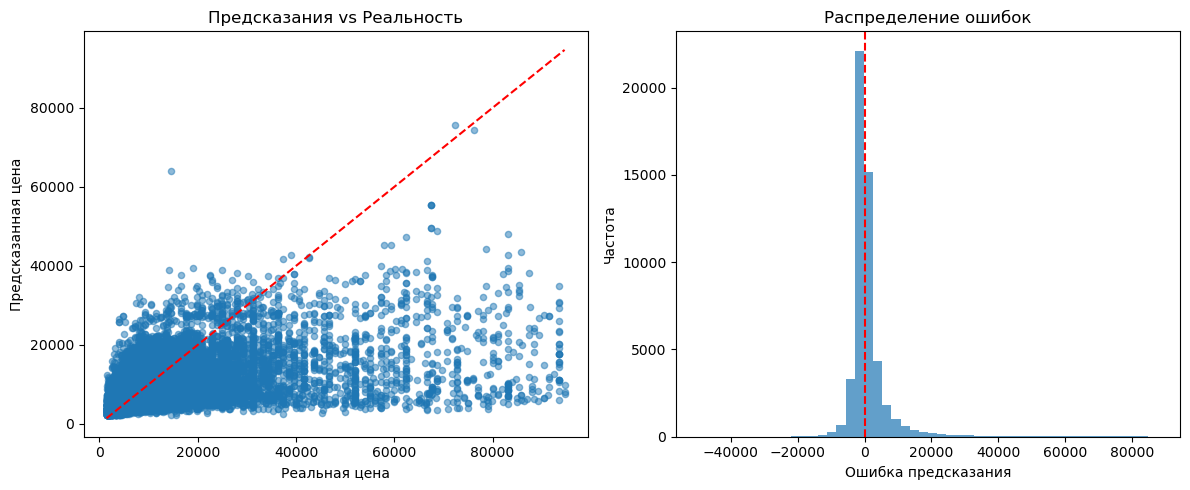

In [100]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test_original, y_pred, alpha=0.5, s=20)
plt.plot([y_test_original.min(), y_test_original.max()], 
         [y_test_original.min(), y_test_original.max()], 'r--')
plt.xlabel('Реальная цена')
plt.ylabel('Предсказанная цена')
plt.title('Предсказания vs Реальность')

plt.subplot(1, 2, 2)
errors = y_test_original - y_pred
plt.hist(errors, bins=50, alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('Распределение ошибок')

plt.tight_layout()
plt.show()

In [101]:
df_rent_ansamble = df_rent[[
    "tom", 
    "building_age", 
    "total_floor_count", 
    "floor_no", 
    "room_count", 
    "size", 
    "heating_type_encoded"
]].copy()


In [102]:
y_rent = df_rent['price'].copy()

In [103]:
common_index = df_rent_ansamble.index.intersection(y_rent.index)
X_rent = df_rent_ansamble.loc[common_index]
y_rent = y_rent.loc[common_index]

In [104]:
print("Статистика цены аренды:")
print(f"Min: {y_rent.min():,.0f} EUR.")
print(f"Max: {y_rent.max():,.0f} EUR.")
print(f"Mean: {y_rent.mean():,.0f} EUR.")
print(f"Std: {y_rent.std():,.0f} EUR.")
print(f"Количество объектов: {len(y_rent)}")

Статистика цены аренды:
Min: 0 EUR.
Max: 23,918 EUR.
Mean: 65 EUR.
Std: 435 EUR.
Количество объектов: 102603


In [105]:
if y_rent.max() / y_rent.mean() > 100:
    print("⚠️  Обнаружены выбросы в ценах аренды!")
    
    # Удаляем верхние и нижние 2%
    lower_bound = y_rent.quantile(0.02)
    upper_bound = y_rent.quantile(0.98)
    mask = (y_rent >= lower_bound) & (y_rent <= upper_bound)
    
    X_rent = X_rent.loc[mask]
    y_rent = y_rent.loc[mask]
    print(f"После удаления выбросов: {X_rent.shape}, {y_rent.shape}")


⚠️  Обнаружены выбросы в ценах аренды!
После удаления выбросов: (99423, 7), (99423,)


In [211]:
print("Применяем логарифмирование к цене аренды...")
y_rent_log = np.log1p(y_rent)

# 4. РАЗДЕЛЕНИЕ ДАННЫХ
X_train_rent, X_test_rent, y_train_rent, y_test_rent = train_test_split(
    X_rent, y_rent_log, test_size=0.2, random_state=42, shuffle=True
)

print(f"\nДанные для обучения аренды: {X_train_rent.shape}, {y_train_rent.shape}")

Применяем логарифмирование к цене аренды...

Данные для обучения аренды: (79538, 7), (79538,)


In [213]:
print("\n" + "=" * 60)
print("ОБУЧЕНИЕ МОДЕЛИ ДЛЯ АРЕНДЫ")
print("=" * 60)

model_rent = RandomForestRegressor(
    n_estimators=150,
    max_depth=12,
    min_samples_split=3,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

model_rent.fit(X_train_rent, y_train_rent)


ОБУЧЕНИЕ МОДЕЛИ ДЛЯ АРЕНДЫ


RandomForestRegressor(max_depth=12, min_samples_split=3, n_estimators=150,
                      n_jobs=-1, random_state=42)

In [217]:
y_pred_log_rent = model_rent.predict(X_test_rent)

# Обратное преобразование из логарифма
y_pred_rent = np.expm1(y_pred_log_rent)
y_test_original_rent = np.expm1(y_test_rent)

# Метрики для аренды
rmse_rent = np.sqrt(mean_squared_error(y_test_original_rent, y_pred_rent))
mae_rent = mean_absolute_error(y_test_original_rent, y_pred_rent)
r2_rent = r2_score(y_test_original_rent, y_pred_rent)

# Безопасный расчет MAPE для аренды
def safe_mape(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

mape_rent = safe_mape(y_test_original_rent, y_pred_rent)

# Дополнительные метрики точности
within_10_percent = (np.abs((y_test_original_rent - y_pred_rent) / y_test_original_rent) <= 0.1).mean() * 100
within_20_percent = (np.abs((y_test_original_rent - y_pred_rent) / y_test_original_rent) <= 0.2).mean() * 100
within_30_percent = (np.abs((y_test_original_rent - y_pred_rent) / y_test_original_rent) <= 0.3).mean() * 100

print("РЕЗУЛЬТАТЫ ДЛЯ АРЕНДЫ:")
print(f"R²: {r2_rent:.3f}")
print(f"RMSE: {rmse_rent:,.0f} EUR.")
print(f"MAE: {mae_rent:,.0f} EUR.")
print(f"MAPE: {mape_rent:.1f}%")
print(f"Точность в пределах 10%: {within_10_percent:.1f}%")
print(f"Точность в пределах 20%: {within_20_percent:.1f}%")
print(f"Точность в пределах 30%: {within_30_percent:.1f}%")

РЕЗУЛЬТАТЫ ДЛЯ АРЕНДЫ:
R²: 0.213
RMSE: 40 EUR.
MAE: 16 EUR.
MAPE: 38.4%
Точность в пределах 10%: 18.9%
Точность в пределах 20%: 36.3%
Точность в пределах 30%: 52.1%


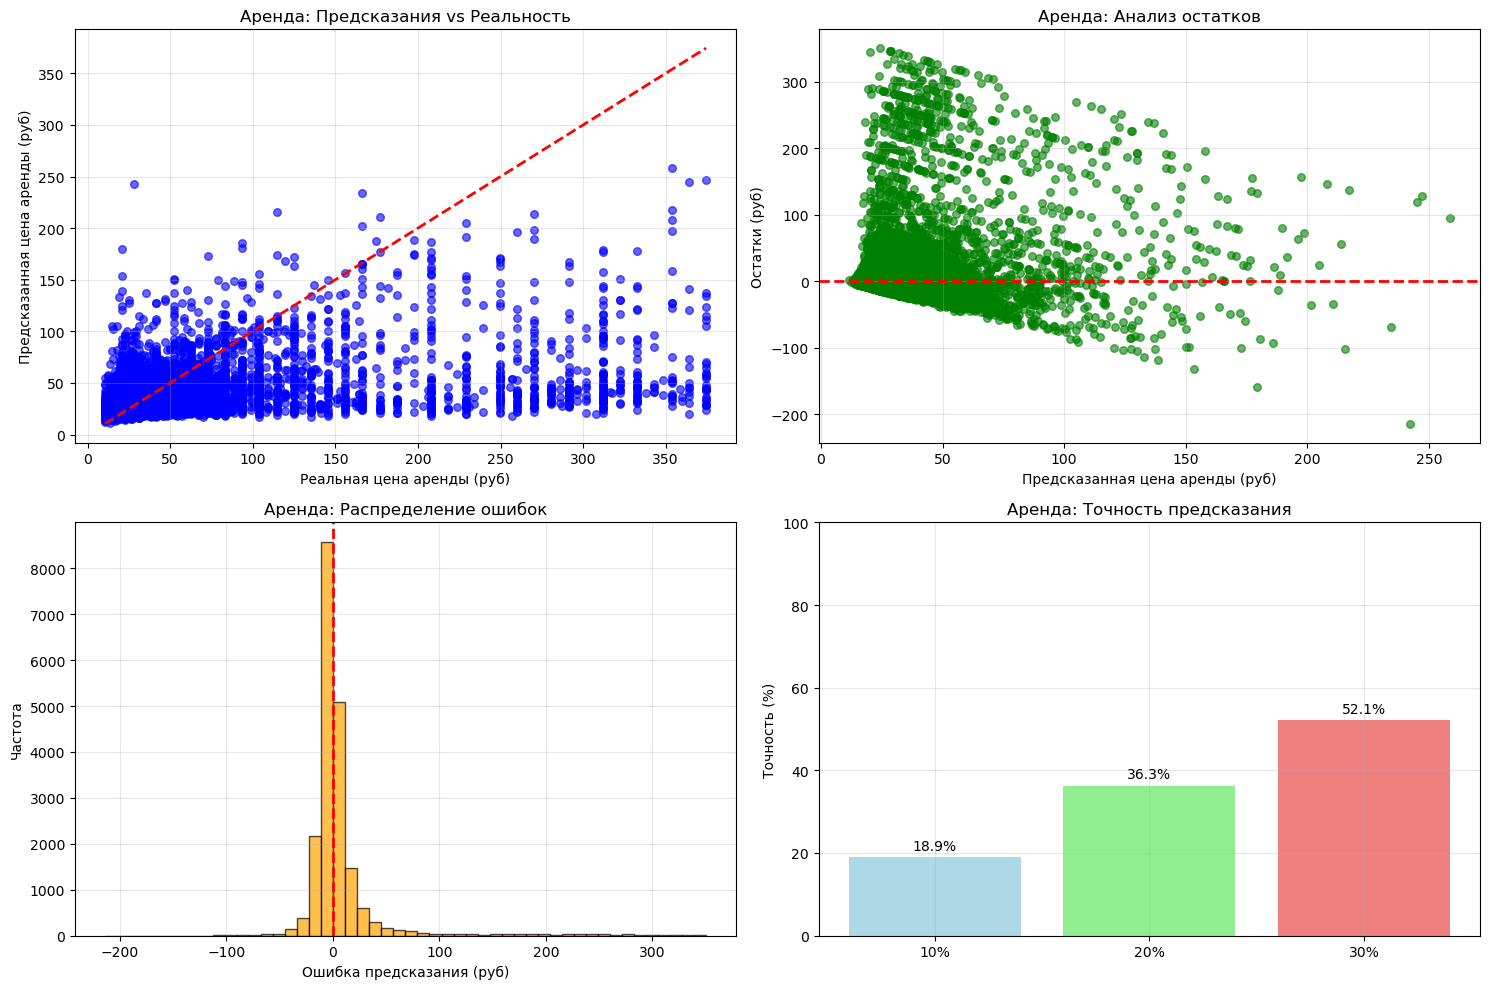

In [219]:
plt.figure(figsize=(15, 10))

# График 1: Предсказания vs Реальность
plt.subplot(2, 2, 1)
plt.scatter(y_test_original_rent, y_pred_rent, alpha=0.6, s=30, color='blue')
plt.plot([y_test_original_rent.min(), y_test_original_rent.max()], 
         [y_test_original_rent.min(), y_test_original_rent.max()], 'r--', lw=2)
plt.xlabel('Реальная цена аренды (руб)')
plt.ylabel('Предсказанная цена аренды (руб)')
plt.title('Аренда: Предсказания vs Реальность')
plt.grid(True, alpha=0.3)

# График 2: Остатки
plt.subplot(2, 2, 2)
residuals_rent = y_test_original_rent - y_pred_rent
plt.scatter(y_pred_rent, residuals_rent, alpha=0.6, s=30, color='green')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Предсказанная цена аренды (руб)')
plt.ylabel('Остатки (руб)')
plt.title('Аренда: Анализ остатков')
plt.grid(True, alpha=0.3)

# График 3: Распределение ошибок
plt.subplot(2, 2, 3)
plt.hist(residuals_rent, bins=50, alpha=0.7, color='orange', edgecolor='black')
plt.axvline(x=0, color='r', linestyle='--', lw=2)
plt.xlabel('Ошибка предсказания (руб)')
plt.ylabel('Частота')
plt.title('Аренда: Распределение ошибок')
plt.grid(True, alpha=0.3)

# График 4: Точность в разных диапазонах
plt.subplot(2, 2, 4)
accuracy_ranges = ['10%', '20%', '30%']
accuracy_values = [within_10_percent, within_20_percent, within_30_percent]
bars = plt.bar(accuracy_ranges, accuracy_values, color=['lightblue', 'lightgreen', 'lightcoral'])
plt.ylabel('Точность (%)')
plt.title('Аренда: Точность предсказания')
plt.ylim(0, 100)
for bar, value in zip(bars, accuracy_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{value:.1f}%', ha='center', va='bottom')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [221]:
print("\n" + "=" * 60)
print("ВАЖНОСТЬ ПРИЗНАКОВ ДЛЯ АРЕНДЫ")
print("=" * 60)

feature_importance_rent = pd.DataFrame({
    'feature': X_rent.columns,
    'importance': model_rent.feature_importances_
}).sort_values('importance', ascending=False)

print("Важность признаков для аренды:")
for i, row in feature_importance_rent.iterrows():
    print(f"  {row['feature']}: {row['importance']:.3f}")


ВАЖНОСТЬ ПРИЗНАКОВ ДЛЯ АРЕНДЫ
Важность признаков для аренды:
  size: 0.412
  total_floor_count: 0.185
  heating_type_encoded: 0.117
  building_age: 0.104
  tom: 0.074
  floor_no: 0.072
  room_count: 0.036


In [223]:
print("\n" + "=" * 60)
print("СРАВНЕНИЕ: ПРОДАЖА vs АРЕНДА")
print("=" * 60)

comparison = pd.DataFrame({
    'Метрика': ['R²', 'RMSE', 'MAE', 'MAPE', 'Точность в 20%'],
    'Продажа': [0.305, 7489, 3299, 37.6, f"{within_20_percent:.1f}%"],
    'Аренда': [r2_rent, rmse_rent, mae_rent, mape_rent, f"{within_20_percent:.1f}%"]
})

print(comparison)


СРАВНЕНИЕ: ПРОДАЖА vs АРЕНДА
          Метрика Продажа Аренда
0              R²     0.3    0.2
1            RMSE    7489   40.4
2             MAE    3299   16.3
3            MAPE    37.6   38.4
4  Точность в 20%   36.3%  36.3%


In [225]:
import joblib

joblib.dump(model_rent, 'rent_price_model.pkl')


Модель для аренды сохранена как 'rent_price_model.pkl'
